## 1.2.3. Bài tập thực hành 2

### + Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về bệnh tiểu đường. Dữ liệu lấy tại
https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

#### 1. Chuẩn bị dữ liệu hóa trực quan hóa dữ liệu 

In [1]:
import pandas as pd
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = diabetes_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome']]

count_outcome = diabetes_data['Outcome'].value_counts()

display(diabetes_data.info(), diabetes_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'PHÂN PHỐI BỆNH TIỂU ĐƯỜNG')

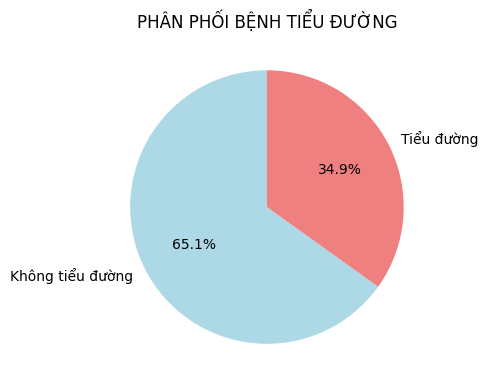

In [3]:
#  PHÂN PHỐI BIẾN MỤC TIÊU (Outcome)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
outcome_counts = diabetes_data['Outcome'].value_counts()
plt.pie(outcome_counts.values, labels=['Không tiểu đường', 'Tiểu đường'], autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('PHÂN PHỐI BỆNH TIỂU ĐƯỜNG')

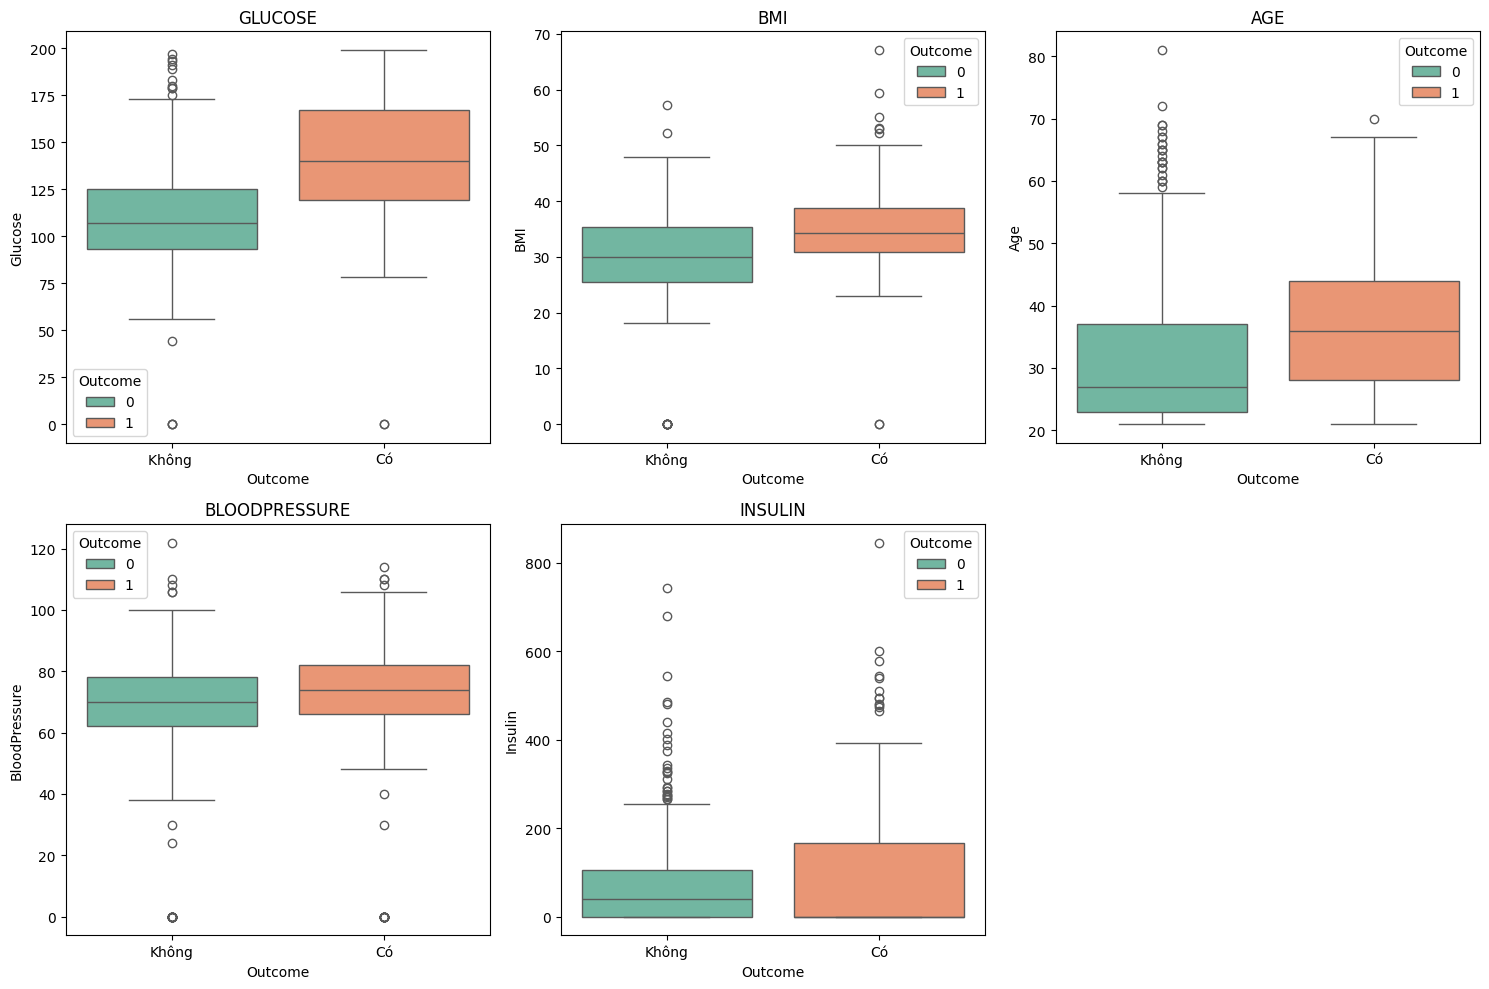

In [4]:
#  PHÂN TÍCH CÁC BIẾN SỐ THEO KẾT QUẢ
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data, hue='Outcome', palette='Set2', legend=True)
plt.title('GLUCOSE')
plt.xticks([0, 1], ['Không ', 'Có'])

plt.subplot(2, 3, 2)
sns.boxplot(x='Outcome', y='BMI', data=diabetes_data, hue='Outcome', palette='Set2', legend=True)
plt.title('BMI')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 3)
sns.boxplot(x='Outcome', y='Age', data=diabetes_data, hue='Outcome', palette='Set2', legend=True)
plt.title('AGE')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 4)
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_data, hue='Outcome', palette='Set2', legend=True)
plt.title('BLOODPRESSURE')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 5)
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_data, hue='Outcome', palette='Set2', legend=True)
plt.title('INSULIN')
plt.xticks([0, 1], ['Không', 'Có'])

plt.tight_layout()
plt.show()

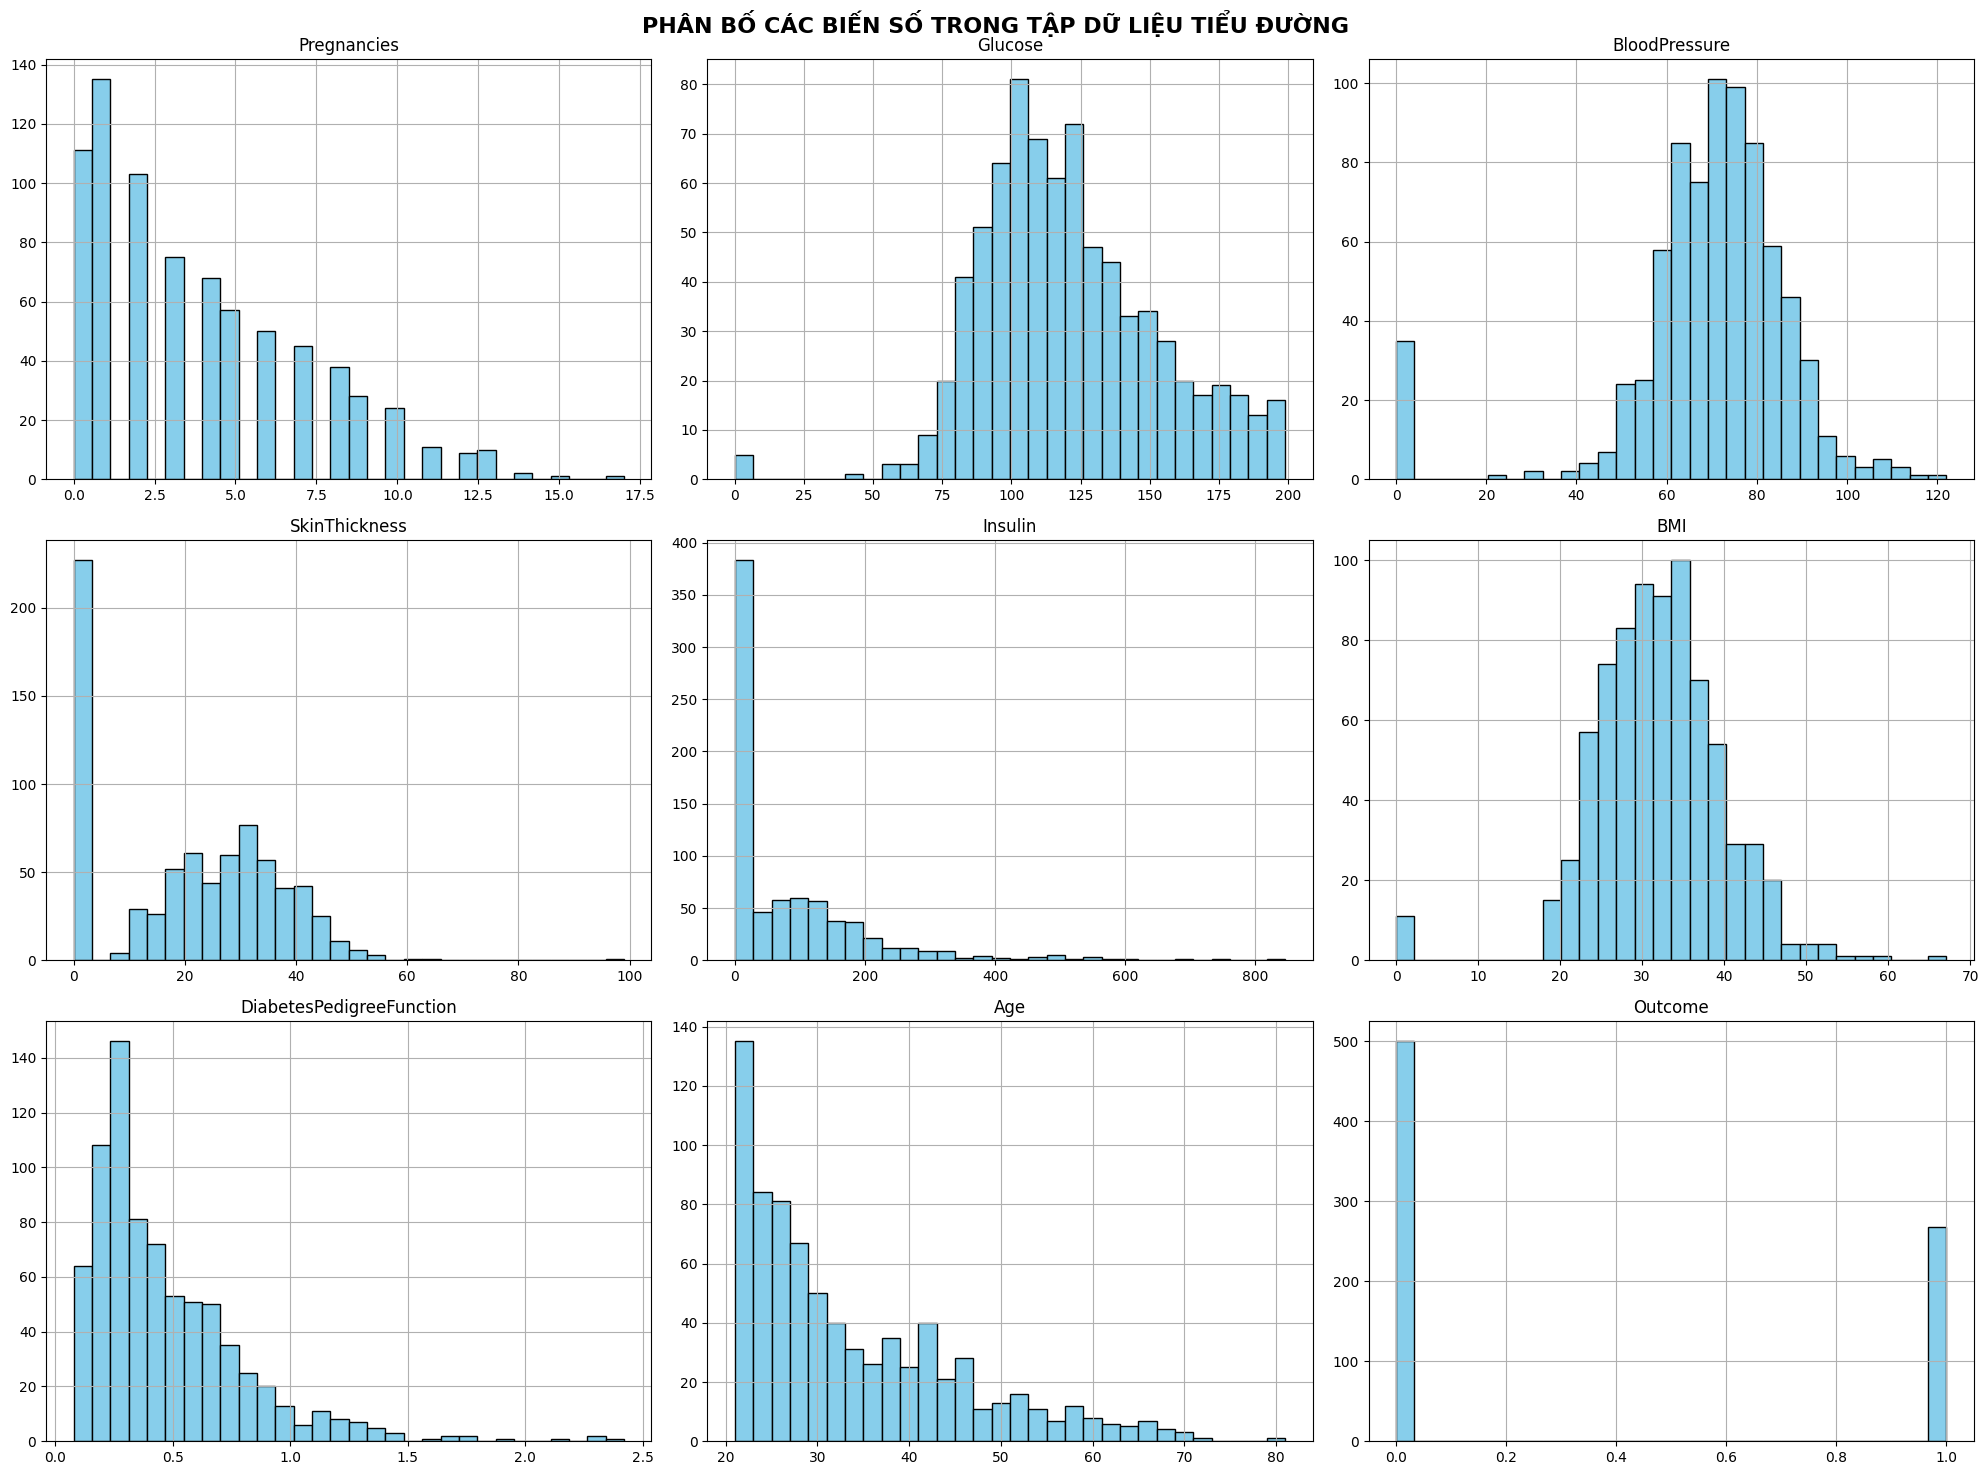

In [5]:
# HISTOGRAM CHO TẤT CẢ CÁC BIẾN SỐ
diabetes_data.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

plt.suptitle('PHÂN BỐ CÁC BIẾN SỐ TRONG TẬP DỮ LIỆU TIỂU ĐƯỜNG', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

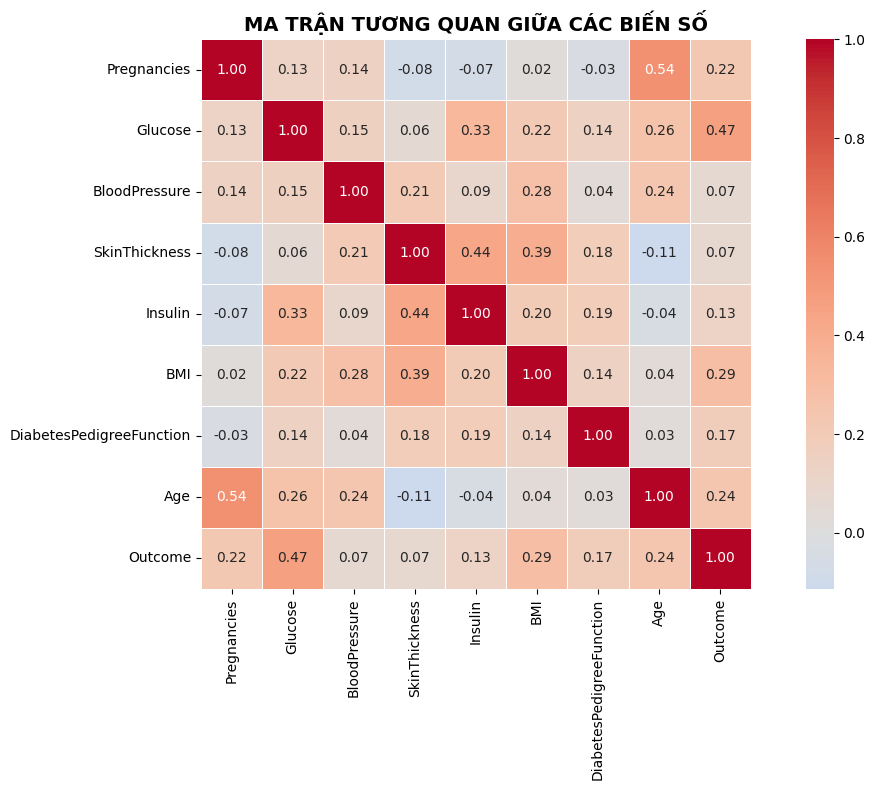

In [6]:
# MA TRẬN TƯƠNG QUAN
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

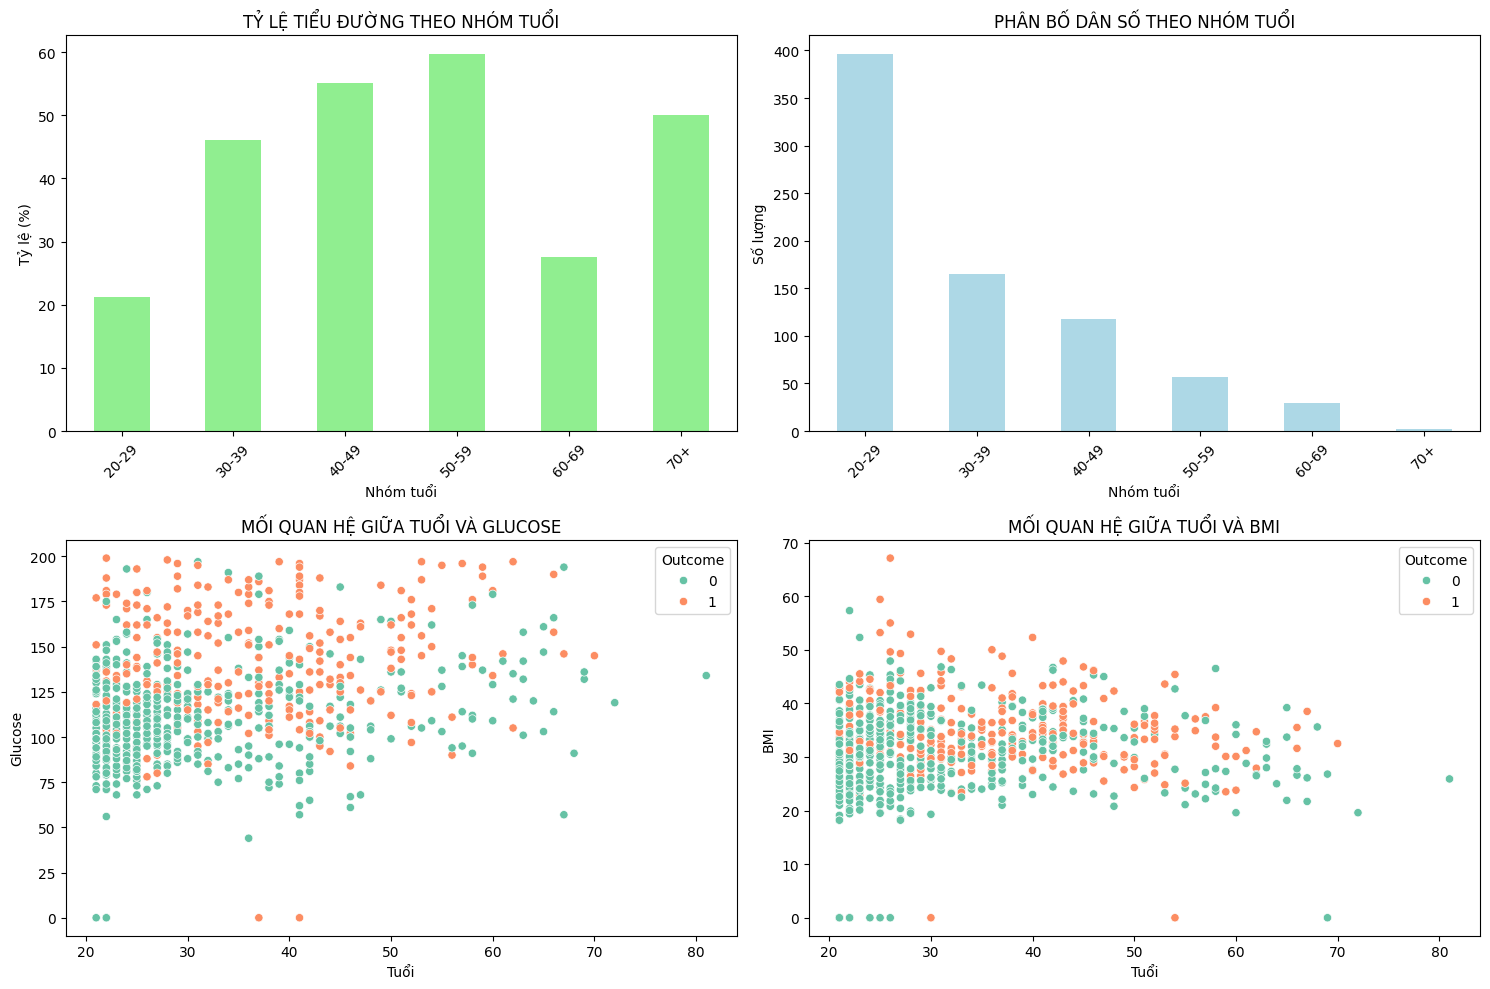

In [7]:
# PHÂN TÍCH THEO ĐỘ TUỔI
plt.figure(figsize=(15, 10))

# Phân nhóm tuổi
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
diabetes_data['AgeGroup'] = pd.cut(diabetes_data['Age'], bins=bins, labels=labels, right=False)

plt.subplot(2, 2, 1)
age_outcome = diabetes_data.groupby('AgeGroup', observed=True)['Outcome'].mean() * 100
age_outcome.plot(kind='bar', color='lightgreen')
plt.title('TỶ LỆ TIỂU ĐƯỜNG THEO NHÓM TUỔI')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
age_distribution = diabetes_data['AgeGroup'].value_counts().sort_index()
age_distribution.plot(kind='bar', color='lightblue')
plt.title('PHÂN BỐ DÂN SỐ THEO NHÓM TUỔI')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_data, palette='Set2')
plt.title('MỐI QUAN HỆ GIỮA TUỔI VÀ GLUCOSE')
plt.xlabel('Tuổi')
plt.ylabel('Glucose')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=diabetes_data, palette='Set2')
plt.title('MỐI QUAN HỆ GIỮA TUỔI VÀ BMI')
plt.xlabel('Tuổi')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

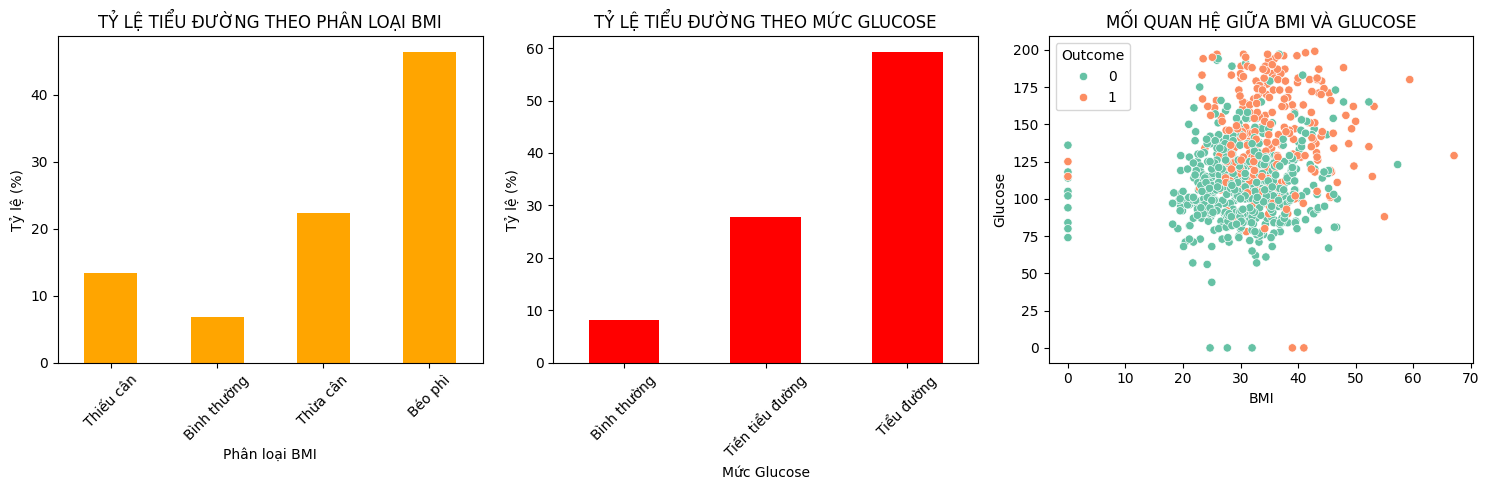

In [8]:
# PHÂN TÍCH BMI VÀ GLUCOSE

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Phân loại BMI
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì']
diabetes_data['BMICategory'] = pd.cut(diabetes_data['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)
bmi_outcome = diabetes_data.groupby('BMICategory', observed=True)['Outcome'].mean() * 100
bmi_outcome.plot(kind='bar', color='orange')
plt.title('TỶ LỆ TIỂU ĐƯỜNG THEO PHÂN LOẠI BMI')
plt.xlabel('Phân loại BMI')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
# Phân loại Glucose
glucose_bins = [0, 100, 126, 300]
glucose_labels = ['Bình thường', 'Tiền tiểu đường', 'Tiểu đường']
diabetes_data['GlucoseCategory'] = pd.cut(diabetes_data['Glucose'], bins=glucose_bins, labels=glucose_labels, right=False)
glucose_outcome = diabetes_data.groupby('GlucoseCategory', observed=True)['Outcome'].mean() * 100
glucose_outcome.plot(kind='bar', color='red')
plt.title('TỶ LỆ TIỂU ĐƯỜNG THEO MỨC GLUCOSE')
plt.xlabel('Mức Glucose')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=diabetes_data, palette='Set2')
plt.title('MỐI QUAN HỆ GIỮA BMI VÀ GLUCOSE')
plt.xlabel('BMI')
plt.ylabel('Glucose')

plt.tight_layout()
plt.show()

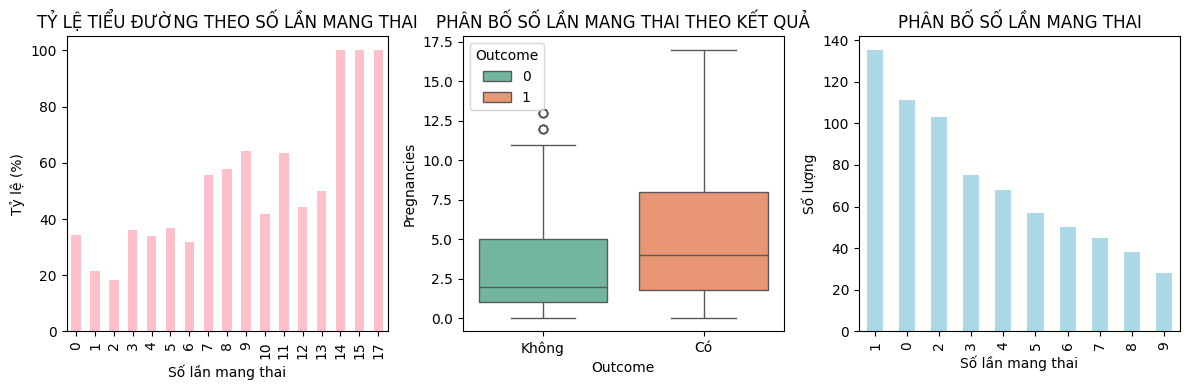

In [9]:
# PHÂN TÍCH SỐ LẦN MANG THAI (CHO NỮ)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pregnancy_outcome = diabetes_data.groupby('Pregnancies')['Outcome'].mean() * 100
pregnancy_outcome.plot(kind='bar', color='pink', figsize=(12, 4))
plt.title('TỶ LỆ TIỂU ĐƯỜNG THEO SỐ LẦN MANG THAI')
plt.xlabel('Số lần mang thai')
plt.ylabel('Tỷ lệ (%)')

plt.subplot(1, 3, 2)
sns.boxplot(x='Outcome', y='Pregnancies', data=diabetes_data,hue='Outcome', palette='Set2')
plt.title('PHÂN BỐ SỐ LẦN MANG THAI THEO KẾT QUẢ')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(1, 3, 3)
pregnancy_counts = diabetes_data['Pregnancies'].value_counts().head(10)
pregnancy_counts.plot(kind='bar', color='lightblue')
plt.title('PHÂN BỐ SỐ LẦN MANG THAI')
plt.xlabel('Số lần mang thai')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

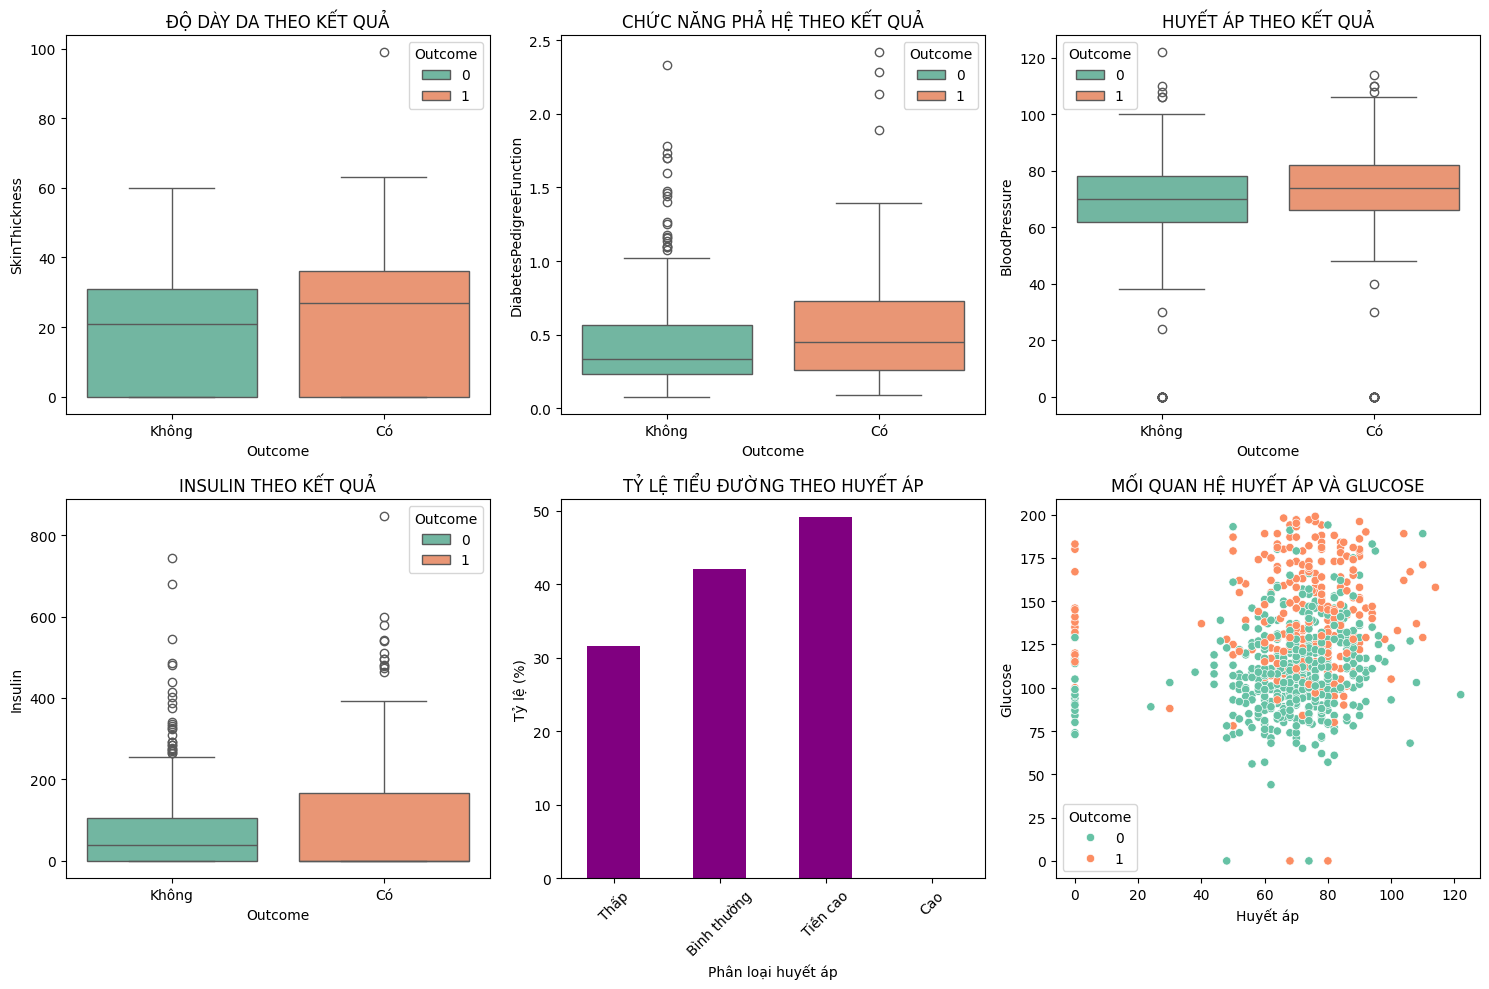

In [10]:
# PHÂN TÍCH CÁC BIẾN KHÁC

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='Outcome', y='SkinThickness', data=diabetes_data,hue='Outcome', palette='Set2')
plt.title('ĐỘ DÀY DA THEO KẾT QUẢ')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 2)
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_data,hue='Outcome', palette='Set2')
plt.title('CHỨC NĂNG PHẢ HỆ THEO KẾT QUẢ')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 3)
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_data,hue='Outcome', palette='Set2')
plt.title('HUYẾT ÁP THEO KẾT QUẢ')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 4)
sns.boxplot(x='Outcome', y='Insulin', data=diabetes_data,hue='Outcome', palette='Set2')
plt.title('INSULIN THEO KẾT QUẢ')
plt.xticks([0, 1], ['Không', 'Có'])

plt.subplot(2, 3, 5)
# Phân tích huyết áp
bp_bins = [0, 80, 90, 120, 200]
bp_labels = ['Thấp', 'Bình thường', 'Tiền cao', 'Cao']
diabetes_data['BPCategory'] = pd.cut(diabetes_data['BloodPressure'], bins=bp_bins, labels=bp_labels, right=False)
bp_outcome = diabetes_data.groupby('BPCategory', observed=True)['Outcome'].mean() * 100
bp_outcome.plot(kind='bar', color='purple')

plt.title('TỶ LỆ TIỂU ĐƯỜNG THEO HUYẾT ÁP')
plt.xlabel('Phân loại huyết áp')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.scatterplot(x='BloodPressure', y='Glucose', hue='Outcome', data=diabetes_data, palette='Set2')
plt.title('MỐI QUAN HỆ HUYẾT ÁP VÀ GLUCOSE')
plt.xlabel('Huyết áp')
plt.ylabel('Glucose')

plt.tight_layout()
plt.show()

In [11]:
 # THỐNG KÊ TỔNG QUAN
total_count = len(diabetes_data)
diabetes_count = diabetes_data['Outcome'].sum()
non_diabetes_count = total_count - diabetes_count

print(f"Tổng số bệnh nhân: {total_count}")
print(f"Số bệnh nhân tiểu đường: {diabetes_count} ({diabetes_count/total_count*100:.1f}%)")
print(f"Số bệnh nhân không tiểu đường: {non_diabetes_count} ({non_diabetes_count/total_count*100:.1f}%)")
print(f"\nTuổi trung bình: {diabetes_data['Age'].mean():.1f}")
print(f"Glucose trung bình: {diabetes_data['Glucose'].mean():.1f}")
print(f"BMI trung bình: {diabetes_data['BMI'].mean():.1f}")
print(f"Huyết áp trung bình: {diabetes_data['BloodPressure'].mean():.1f}")

# So sánh các giá trị trung bình theo Outcome
print("\n=== SO SÁNH GIÁ TRỊ TRUNG BÌNH ===")
mean_comparison = diabetes_data.groupby('Outcome').mean(numeric_only=True)
print(mean_comparison)

Tổng số bệnh nhân: 768
Số bệnh nhân tiểu đường: 268 (34.9%)
Số bệnh nhân không tiểu đường: 500 (65.1%)

Tuổi trung bình: 33.2
Glucose trung bình: 120.9
BMI trung bình: 32.0
Huyết áp trung bình: 69.1

=== SO SÁNH GIÁ TRỊ TRUNG BÌNH ===
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


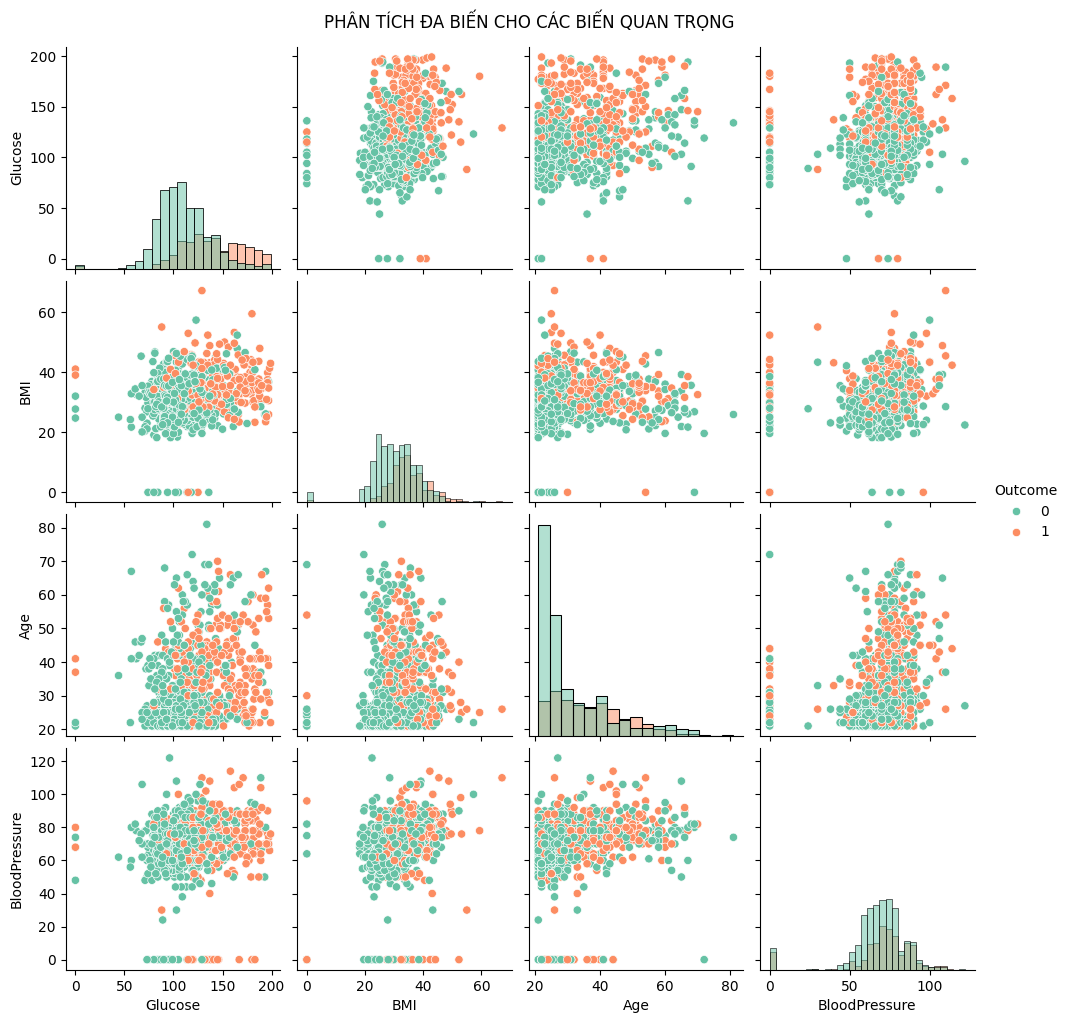

In [12]:
# PAIRPLOT CHO CÁC BIẾN QUAN TRỌNG

important_vars = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Outcome']
sns.pairplot(diabetes_data[important_vars], hue='Outcome', palette='Set2', diag_kind='hist')
plt.suptitle('PHÂN TÍCH ĐA BIẾN CHO CÁC BIẾN QUAN TRỌNG', y=1.02)
plt.show()

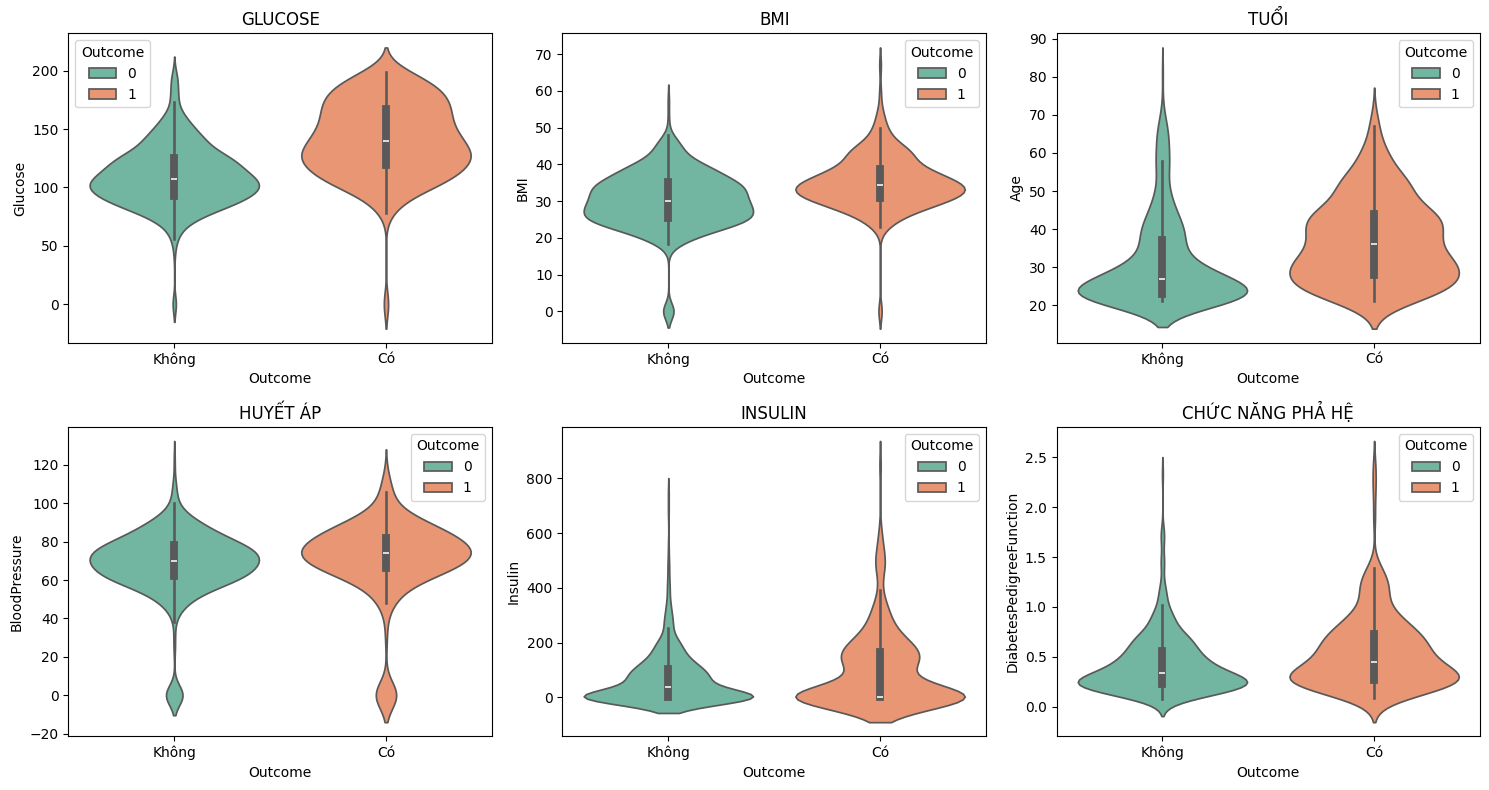

In [13]:
# VIOLIN PLOT CHO CÁC BIẾN CHÍNH

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.violinplot(x='Outcome', y='Glucose', data=diabetes_data,hue='Outcome', palette='Set2')
plt.xticks([0, 1], ['Không', 'Có'])
plt.title('GLUCOSE')

plt.subplot(2, 3, 2)
sns.violinplot(x='Outcome', y='BMI', data=diabetes_data,hue='Outcome', palette='Set2')
plt.xticks([0, 1], ['Không', 'Có'])
plt.title('BMI')

plt.subplot(2, 3, 3)
sns.violinplot(x='Outcome', y='Age', data=diabetes_data,hue='Outcome', palette='Set2')
plt.xticks([0, 1], ['Không', 'Có'])
plt.title('TUỔI')

plt.subplot(2, 3, 4)
sns.violinplot(x='Outcome', y='BloodPressure', data=diabetes_data,hue='Outcome', palette='Set2')
plt.xticks([0, 1], ['Không', 'Có'])
plt.title('HUYẾT ÁP')

plt.subplot(2, 3, 5)
sns.violinplot(x='Outcome', y='Insulin', data=diabetes_data,hue='Outcome',palette='Set2')
plt.xticks([0, 1], ['Không', 'Có'])
plt.title('INSULIN')

plt.subplot(2, 3, 6)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_data,hue='Outcome', palette='Set2')
plt.xticks([0, 1], ['Không', 'Có'])
plt.title('CHỨC NĂNG PHẢ HỆ')

plt.tight_layout()
plt.show()

# Xóa các cột phân loại đã tạo
diabetes_data = diabetes_data.drop(['AgeGroup', 'BMICategory', 'GlucoseCategory', 'BPCategory'], axis=1)

### + Thực hiện EDA trên tập dữ liệu mua sắm tại siêu thị. Tập dữ liệu lấy từ
https://www.kaggle.com/code/rajatkumar30/eda-online-retail

#### 1. Chuẩn bị dữ liệu hóa trực quan hóa dữ liệu

In [15]:
import pandas as pd

onlRetail_data = pd.read_csv('OnlineRetail.csv')
onlRetail_data = onlRetail_data[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID', 'Country']]


display(onlRetail_data.info(), onlRetail_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


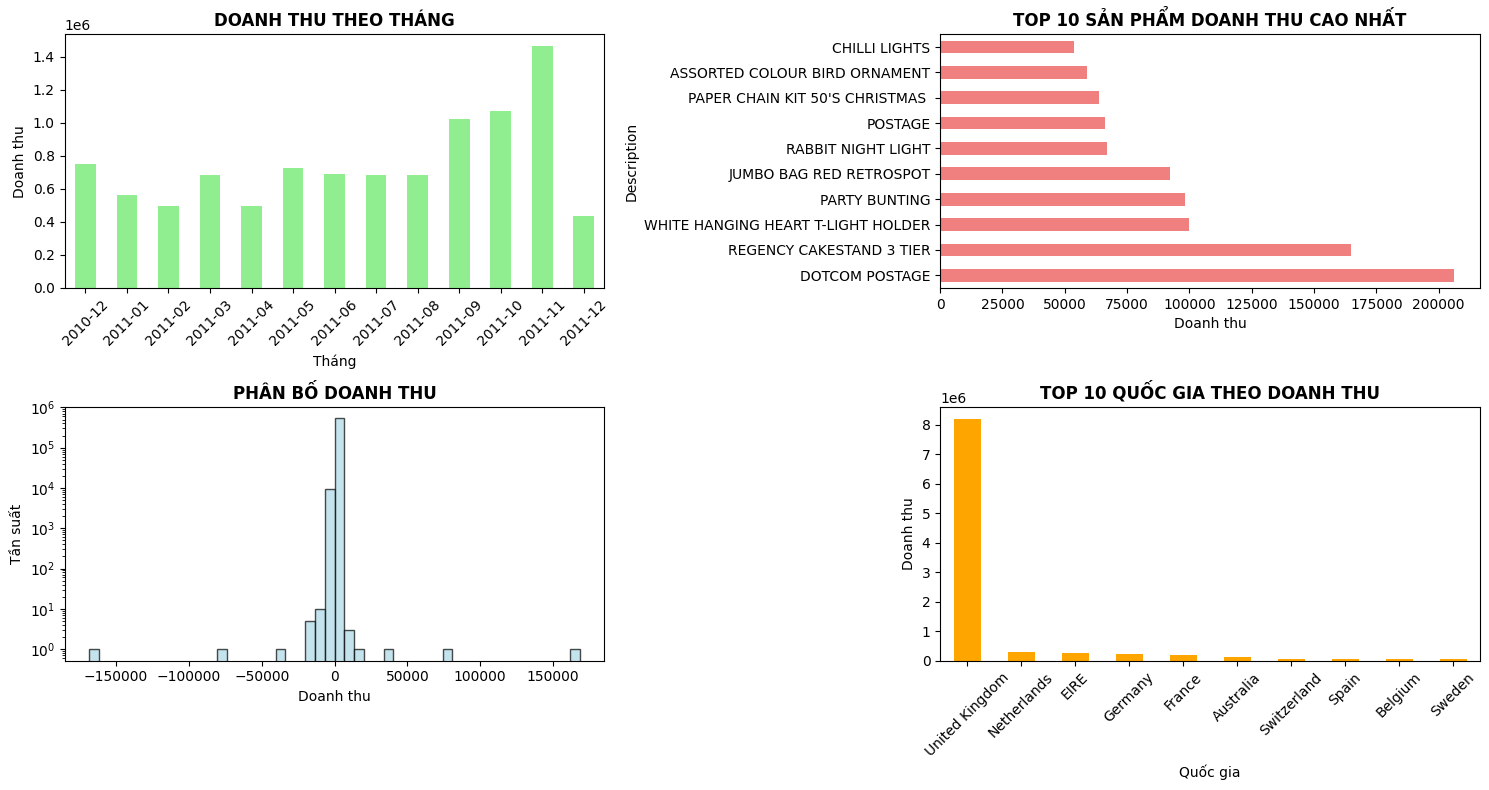

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

onlRetail_data['TotalAmount'] = onlRetail_data['Quantity'] * onlRetail_data['UnitPrice']

onlRetail_data['InvoiceDate'] = pd.to_datetime(onlRetail_data['InvoiceDate'])

# Doanh thu theo tháng
onlRetail_data['YearMonth'] = onlRetail_data['InvoiceDate'].dt.to_period('M')
monthly_revenue = onlRetail_data.groupby('YearMonth')['TotalAmount'].sum()

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
monthly_revenue.plot(kind='bar', color='lightgreen')
plt.title('DOANH THU THEO THÁNG', fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)

# Top 10 sản phẩm có doanh thu cao nhất
plt.subplot(2, 2, 2)
top_products = onlRetail_data.groupby('Description')['TotalAmount'].sum().nlargest(10)
top_products.plot(kind='barh', color='lightcoral')
plt.title('TOP 10 SẢN PHẨM DOANH THU CAO NHẤT', fontweight='bold')
plt.xlabel('Doanh thu')

# Phân bố doanh thu
plt.subplot(2, 2, 3)
plt.hist(onlRetail_data['TotalAmount'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('PHÂN BỐ DOANH THU', fontweight='bold')
plt.xlabel('Doanh thu')
plt.ylabel('Tần suất')
plt.yscale('log')  # Log scale để dễ quan sát

# Doanh thu theo quốc gia (top 10)
plt.subplot(2, 2, 4)
country_revenue = onlRetail_data.groupby('Country')['TotalAmount'].sum().nlargest(10)
country_revenue.plot(kind='bar', color='orange')
plt.title('TOP 10 QUỐC GIA THEO DOANH THU', fontweight='bold')
plt.xlabel('Quốc gia')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

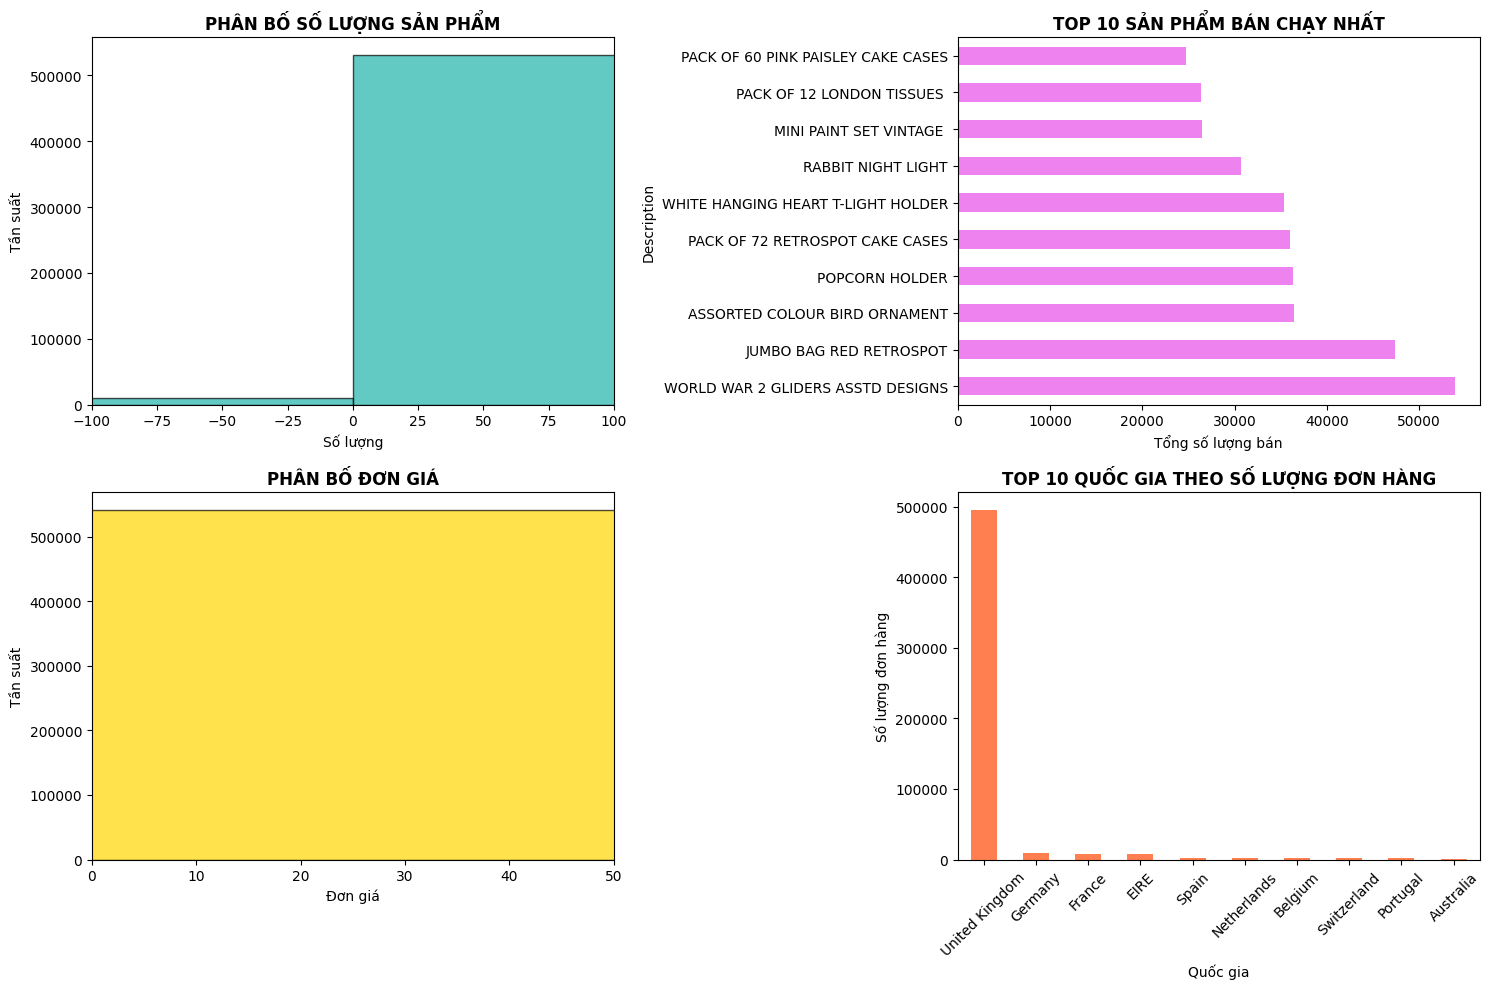

In [17]:
# PHÂN TÍCH SẢN PHẨM VÀ SỐ LƯỢNG
plt.figure(figsize=(15, 10))

# Phân bố số lượng sản phẩm
plt.subplot(2, 2, 1)
plt.hist(onlRetail_data['Quantity'], bins=50, color='lightseagreen', edgecolor='black', alpha=0.7)
plt.title('PHÂN BỐ SỐ LƯỢNG SẢN PHẨM', fontweight='bold')
plt.xlabel('Số lượng')
plt.ylabel('Tần suất')
plt.xlim(-100, 100)  # Giới hạn để loại bỏ outliers

# Top 10 sản phẩm bán chạy nhất
plt.subplot(2, 2, 2)
top_selling = onlRetail_data.groupby('Description')['Quantity'].sum().nlargest(10)
top_selling.plot(kind='barh', color='violet')
plt.title('TOP 10 SẢN PHẨM BÁN CHẠY NHẤT', fontweight='bold')
plt.xlabel('Tổng số lượng bán')

# Phân bố đơn giá
plt.subplot(2, 2, 3)
plt.hist(onlRetail_data['UnitPrice'], bins=50, color='gold', edgecolor='black', alpha=0.7)
plt.title('PHÂN BỐ ĐƠN GIÁ', fontweight='bold')
plt.xlabel('Đơn giá')
plt.ylabel('Tần suất')
plt.xlim(0, 50)  # Giới hạn để loại bỏ outliers

# Số lượng đơn hàng theo quốc gia (top 10)
plt.subplot(2, 2, 4)
country_orders = onlRetail_data['Country'].value_counts().head(10)
country_orders.plot(kind='bar', color='coral')
plt.title('TOP 10 QUỐC GIA THEO SỐ LƯỢNG ĐƠN HÀNG', fontweight='bold')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

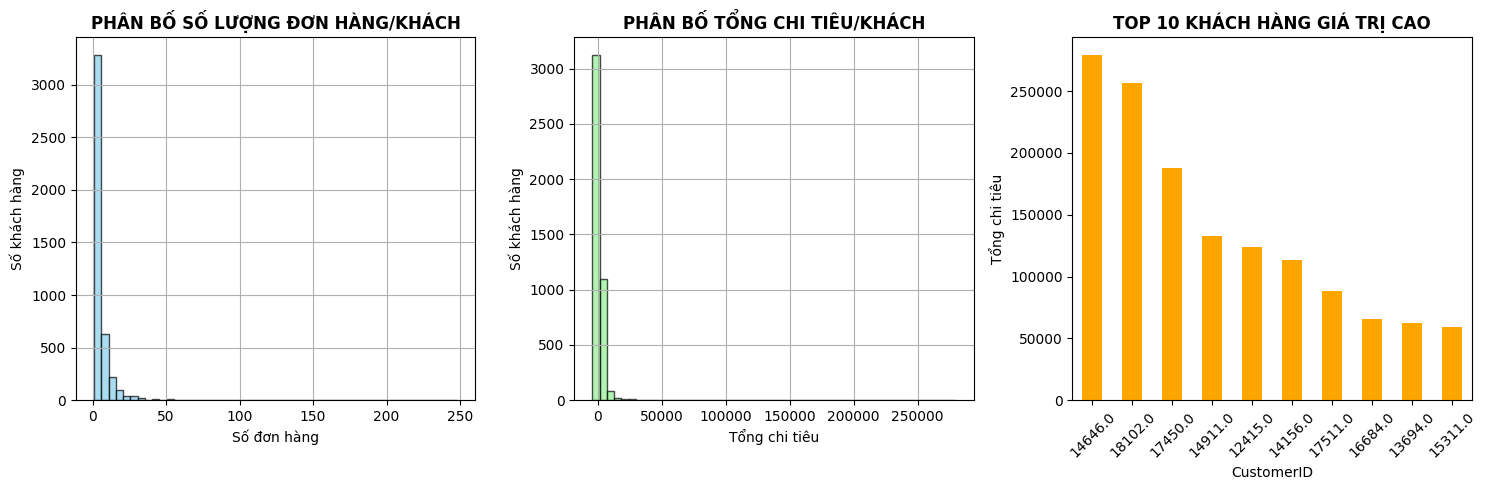

In [18]:
# PHÂN TÍCH KHÁCH HÀNG
# Loại bỏ dữ liệu khách hàng null
customer_data = onlRetail_data.dropna(subset=['CustomerID'])

plt.figure(figsize=(15, 5))

# Phân tích số lượng mua hàng theo khách hàng
plt.subplot(1, 3, 1)
customer_orders = customer_data.groupby('CustomerID')['InvoiceNo'].nunique()
customer_orders.hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('PHÂN BỐ SỐ LƯỢNG ĐƠN HÀNG/KHÁCH', fontweight='bold')
plt.xlabel('Số đơn hàng')
plt.ylabel('Số khách hàng')

# Phân tích giá trị mua hàng theo khách hàng
plt.subplot(1, 3, 2)
customer_spending = customer_data.groupby('CustomerID')['TotalAmount'].sum()
customer_spending.hist(bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('PHÂN BỐ TỔNG CHI TIÊU/KHÁCH', fontweight='bold')
plt.xlabel('Tổng chi tiêu')
plt.ylabel('Số khách hàng')

# Top 10 khách hàng có giá trị cao nhất
plt.subplot(1, 3, 3)
top_customers = customer_spending.nlargest(10)
top_customers.plot(kind='bar', color='orange')
plt.title('TOP 10 KHÁCH HÀNG GIÁ TRỊ CAO', fontweight='bold')
plt.xlabel('CustomerID')
plt.ylabel('Tổng chi tiêu')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

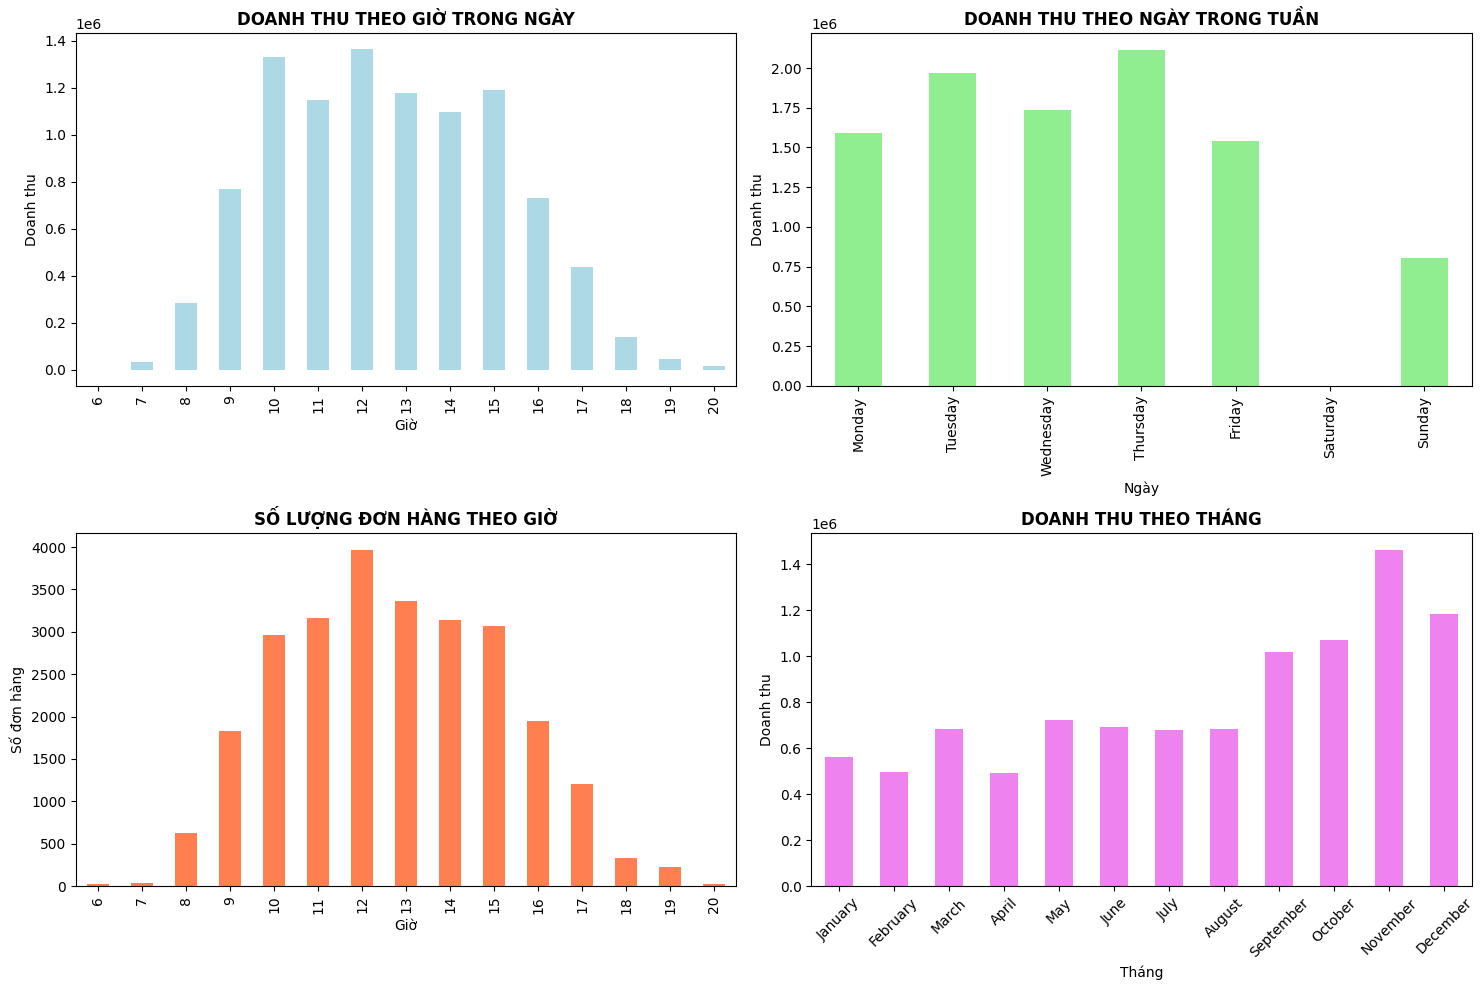

In [19]:
#  PHÂN TÍCH THỜI GIAN
# Thêm các cột thời gian
onlRetail_data['Hour'] = onlRetail_data['InvoiceDate'].dt.hour
onlRetail_data['DayOfWeek'] = onlRetail_data['InvoiceDate'].dt.day_name()
onlRetail_data['Month'] = onlRetail_data['InvoiceDate'].dt.month_name()

plt.figure(figsize=(15, 10))

# Doanh thu theo giờ trong ngày
plt.subplot(2, 2, 1)
hourly_revenue = onlRetail_data.groupby('Hour')['TotalAmount'].sum()
hourly_revenue.plot(kind='bar', color='lightblue')
plt.title('DOANH THU THEO GIỜ TRONG NGÀY', fontweight='bold')
plt.xlabel('Giờ')
plt.ylabel('Doanh thu')

# Doanh thu theo ngày trong tuần
plt.subplot(2, 2, 2)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue = onlRetail_data.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)
daily_revenue.plot(kind='bar', color='lightgreen')
plt.title('DOANH THU THEO NGÀY TRONG TUẦN', fontweight='bold')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')

# Số lượng đơn hàng theo giờ
plt.subplot(2, 2, 3)
hourly_orders = onlRetail_data.groupby('Hour')['InvoiceNo'].nunique()
hourly_orders.plot(kind='bar', color='coral')
plt.title('SỐ LƯỢNG ĐƠN HÀNG THEO GIỜ', fontweight='bold')
plt.xlabel('Giờ')
plt.ylabel('Số đơn hàng')

# Doanh thu theo tháng
plt.subplot(2, 2, 4)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
monthly_revenue = onlRetail_data.groupby('Month')['TotalAmount'].sum().reindex(month_order)
monthly_revenue.plot(kind='bar', color='violet')
plt.title('DOANH THU THEO THÁNG', fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


=== PHÂN TÍCH TƯƠNG QUAN ===


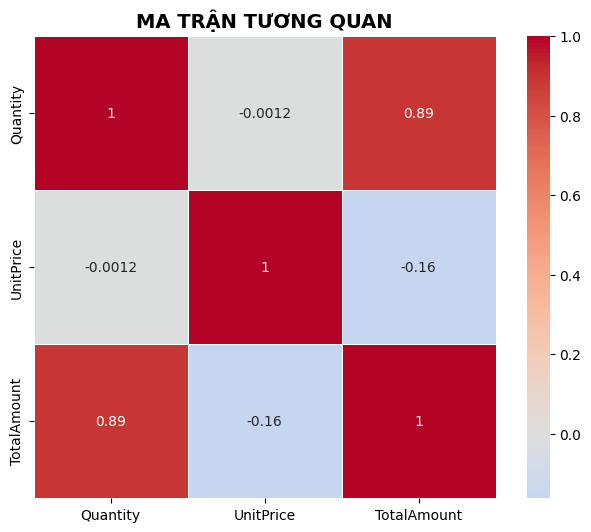

In [20]:
# PHÂN TÍCH TƯƠNG QUAN
print("\n=== PHÂN TÍCH TƯƠNG QUAN ===")
# Chọn các cột số để phân tích tương quan
numeric_cols = ['Quantity', 'UnitPrice', 'TotalAmount']
correlation_matrix = onlRetail_data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('MA TRẬN TƯƠNG QUAN', fontweight='bold', fontsize=14)
plt.show()

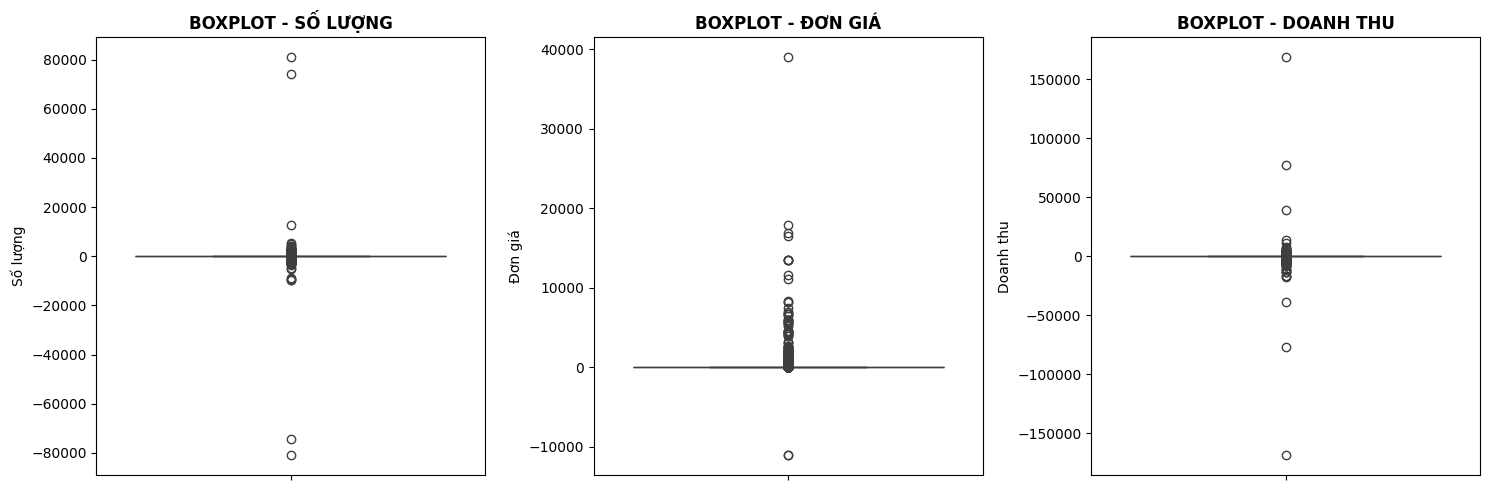

In [21]:
#  PHÁT HIỆN OUTLIERS
plt.figure(figsize=(15, 5))

# Boxplot cho Quantity
plt.subplot(1, 3, 1)
sns.boxplot(y=onlRetail_data['Quantity'])
plt.title('BOXPLOT - SỐ LƯỢNG', fontweight='bold')
plt.ylabel('Số lượng')

# Boxplot cho UnitPrice
plt.subplot(1, 3, 2)
sns.boxplot(y=onlRetail_data['UnitPrice'])
plt.title('BOXPLOT - ĐƠN GIÁ', fontweight='bold')
plt.ylabel('Đơn giá')

# Boxplot cho TotalAmount
plt.subplot(1, 3, 3)
sns.boxplot(y=onlRetail_data['TotalAmount'])
plt.title('BOXPLOT - DOANH THU', fontweight='bold')
plt.ylabel('Doanh thu')

plt.tight_layout()
plt.show()